Question 6

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse
import matplotlib.pyplot as plt

In [ ]:
(train_data,train_targets),(test_data,test_targets)=tf.keras.datasets.boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

Normalizing the data

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

Bulding model

In [ ]:
def build_model():
  model = tf.keras.Sequential([
                               Dense(units=64,activation='relu'),
                               Dense(units=64,activation='relu'),
                               Dense(units=1)
  ])
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

K-fold cross-validation

In [ ]:
k = 4
num_val_samples = len(train_data)//k
num_epochs = 100
all_scores = []
for i in range(k):
  print(f'Processing fold #{i}')
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
       axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs= num_epochs, batch_size=16, verbose=0)
  val_mse, val_mae = model.evaluate(val_data,val_targets, verbose=0)
  all_scores.append(val_mae)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores

[2.065721273422241, 2.447197437286377, 2.457171678543091, 2.686030387878418]

In [ ]:
np.mean(all_scores)

2.4140301942825317

saving the validation logs at each fold

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print(f"Preprocessing fold #{i}")
  #prepare the validation data
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
  #prepare the training data
  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
       axis=0)
  #keras model
  model = build_model()
  #trains the model(in silent mode verbose=0)
  history = model.fit(partial_train_data,partial_train_targets,
                      validation_data=(val_data,val_targets),
                      epochs=num_epochs, batch_size=16,verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)


Preprocessing fold #0
Preprocessing fold #1
Preprocessing fold #2
Preprocessing fold #3


In [ ]:
average_mae_history =[
                      np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
                      

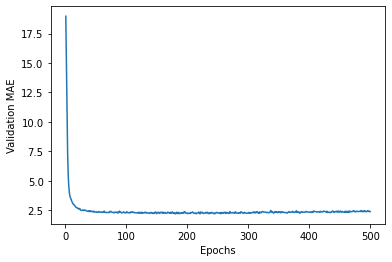

In [ ]:
plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Plotting validation scores, excluding the first 10 data points

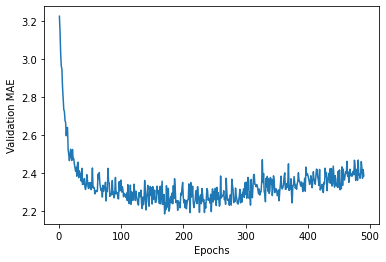

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1,len(truncated_mae_history)+1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Training the final model

In [ ]:
model = build_model()
model.fit(train_data,train_targets,epochs=130,batch_size=16,verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data,test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 16.1368 - mae: 2.3980


In [ ]:
test_mae_score

2.3980228900909424

In [ ]:
predictions = model.predict(test_data)
predictions[0]

array([9.128778], dtype=float32)

The first house in the test set is predicted to have a price of about 10,000 doller

In [ ]:
(train_data, train_labels),(test_data, test_labels) = tf.keras.datasets.boston_housing.load_data()

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((404, 13), (404,), (102, 13), (102,))

In [ ]:
train_data.dtype, train_labels.dtype, test_data.dtype, test_labels.dtype

(dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'))

In [ ]:
train_labels = np.reshape(train_labels, newshape=(-1,1)).astype(np.float32)
test_labels = np.reshape(test_labels, newshape=(-1,1)).astype(np.float32)
train_data = train_data.astype(np.float32)
test_data = test_data.astype(np.float32)

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((404, 13), (404, 1), (102, 13), (102, 1))

In [ ]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(train_data)

MinMaxScaler()

In [ ]:
train_data = min_max_scaler.transform(train_data)

In [ ]:
train_data.min(axis=0), train_data.max(axis=0)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0.9999999 , 1.        , 1.        , 1.        , 1.        ,
        0.9999999 , 1.        , 1.0000001 , 1.        , 1.        ,
        0.9999999 , 1.        , 0.99999994], dtype=float32))

In [ ]:
test_data = min_max_scaler.transform(test_data)

In [ ]:
train_labels.min(), train_labels.max()

(5.0, 50.0)

In [ ]:
input_layer = Input((13,))
x = Dense(units=8, activation='relu')(input_layer)
x = Dense(units=4, activation='relu')(x)
output = Dense(units=1)(x)
reg_model = tf.keras.models.Model(input_layer, output)
reg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reg_model.compile(optimizer='rmsprop' ,loss='mse',metrics=['mae'])

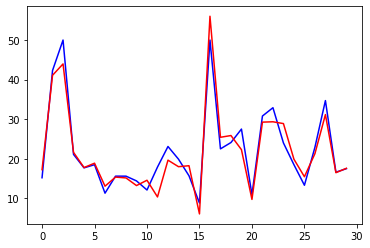

In [ ]:
#prediction before training
plt.plot(train_labels[:30], 'b')
plt.plot(reg_model(train_data[:30]),'r')

In [ ]:
#early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='max', restore_best_weights=True)

In [ ]:
reg_model.fit(train_data, train_labels, batch_size=8, epochs =500, validation_data=(test_data, test_labels))

Epoch 1/500
51/51 [==============================] - 1s 4ms/step - loss: 8.6988 - mae: 2.1524 - val_loss: 26.1135 - val_mae: 3.1537
Epoch 2/500
51/51 [==============================] - 0s 2ms/step - loss: 8.4984 - mae: 2.1215 - val_loss: 25.1650 - val_mae: 3.0876
Epoch 3/500
51/51 [==============================] - 0s 2ms/step - loss: 8.6552 - mae: 2.1386 - val_loss: 25.5119 - val_mae: 3.1051
Epoch 4/500
51/51 [==============================] - 0s 2ms/step - loss: 8.5700 - mae: 2.1294 - val_loss: 25.5754 - val_mae: 3.1115
Epoch 5/500
51/51 [==============================] - 0s 2ms/step - loss: 8.6367 - mae: 2.1282 - val_loss: 25.4521 - val_mae: 3.1075
Epoch 6/500
51/51 [==============================] - 0s 2ms/step - loss: 8.6177 - mae: 2.1382 - val_loss: 25.1288 - val_mae: 3.0895
Epoch 7/500
51/51 [==============================] - 0s 2ms/step - loss: 8.6000 - mae: 2.1215 - val_loss: 25.0635 - val_mae: 3.0675
Epoch 8/500
51/51 [==============================] - 0s 2ms/step - loss: 8.5

In [ ]:
reg_model.evaluate(test_data,test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 19.2618 - mae: 2.8558


[19.261770248413086, 2.855782985687256]

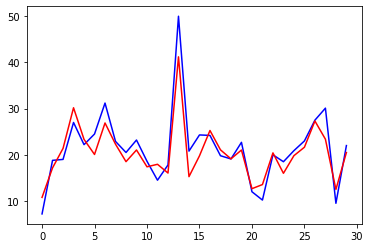

In [ ]:
plt.plot(test_labels[:30], 'b')
plt.plot(reg_model(test_data[:30]),'r')